# Prominent Edge - ticket status

Make sure to install seaborn and pandas modules

```sh
pip install seaborn pandas
```

In [38]:
import pandas as pd
import seaborn as sns

from datetime import datetime

sns.set()
%matplotlib inline

### Reading generated csv files.

In [2]:
df = pd.read_csv('tickets.csv')
df.head()

,Unnamed: 0,id,subject,status_name,assigned_group,created_at
0,0,1484,FireCARES - Access.,open,Unassigned,2018-02-07T17:20:27Z
1,1,1482,Department administrator request - dvanvalkenb...,closed,Accounts,2018-02-06T23:44:27Z
2,2,1481,FireCARES - Access.,open,Unassigned,2018-02-06T23:08:27Z
3,3,1480,Contact request submitted,open,Department and station data updates,2018-02-06T22:20:27Z
4,4,1479,Contact request submitted,open,Department and station data updates,2018-02-06T22:20:27Z


### Data processing

In [5]:
df['datetime'] = pd.to_datetime(df['created_at'])
df['year'] = df['datetime'].dt.year
df.head()

,Unnamed: 0,id,subject,status_name,assigned_group,created_at,datetime,year
0,0,1484,FireCARES - Access.,open,Unassigned,2018-02-07T17:20:27Z,2018-02-07 17:20:27,2018
1,1,1482,Department administrator request - dvanvalkenb...,closed,Accounts,2018-02-06T23:44:27Z,2018-02-06 23:44:27,2018
2,2,1481,FireCARES - Access.,open,Unassigned,2018-02-06T23:08:27Z,2018-02-06 23:08:27,2018
3,3,1480,Contact request submitted,open,Department and station data updates,2018-02-06T22:20:27Z,2018-02-06 22:20:27,2018
4,4,1479,Contact request submitted,open,Department and station data updates,2018-02-06T22:20:27Z,2018-02-06 22:20:27,2018


In [13]:
df_groups = df.groupby(['year', 'status_name', 'assigned_group']).size().reset_index(name='count')

### Generating result for 2017

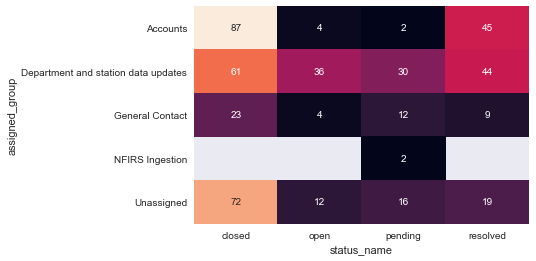

In [33]:
df_grid = df_groups.loc[(df_groups['year'] == 2017)]
df_heatmap = df_grid.pivot(index='assigned_group', columns='status_name', values='count')
sns.heatmap(df_heatmap, annot=True,cbar=False)

### Generating result for 2018

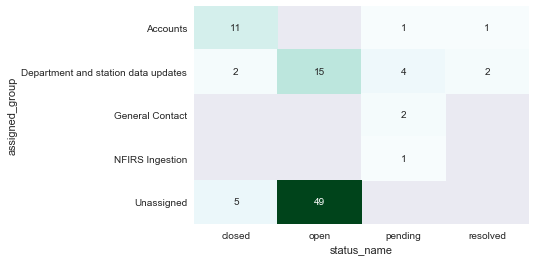

In [61]:
df_grid = df_groups.loc[(df_groups['year'] == 2018)]
df_heatmap = df_grid.pivot(index='assigned_group', columns='status_name', values='count')
sns.heatmap(df_heatmap, annot=True,cbar=False, cmap='BuGn')

## Measuring time for open tickets

In [59]:
not_closed_df = df.loc[(df['status_name'] != 'closed')]
date_today = datetime.today()

not_closed_df['delta_days'] = abs(not_closed_df['datetime'] - date_today).astype('timedelta64[D]').astype('int')
not_closed_df.sort_values(by='delta_days', ascending=False, inplace=True)
not_closed_df.head()

/venvs/pdi/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/venvs/pdi/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Unnamed: 0,id,subject,status_name,assigned_group,created_at,datetime,year,delta_days
557,557,36,FW: FireCARES - Access.,resolved,Unassigned,2017-04-10T17:16:18Z,2017-04-10 17:16:18,2017,302
550,550,60,Department administrator request - a.olesen@ce...,resolved,Accounts,2017-04-16T23:10:57Z,2017-04-16 23:10:57,2017,296
549,549,61,Department administrator request - bmajor@ci.f...,resolved,Accounts,2017-04-17T15:32:58Z,2017-04-17 15:32:58,2017,295
543,543,89,FireCARES - New feedback received.,resolved,Unassigned,2017-04-21T20:27:58Z,2017-04-21 20:27:58,2017,291
542,542,97,Department administrator request - yanceya@min...,resolved,Accounts,2017-04-23T13:30:43Z,2017-04-23 13:30:43,2017,290
